<a href="https://colab.research.google.com/github/ioanna123s/ioanna/blob/main/Ransomware.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#εισαγωγή βιβλιοθηκών - πακέτων
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.covariance import EllipticEnvelope
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report, confusion_matrix
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#εισαγωγή του συνόλου δεδομένων
dataset=pd.read_csv("https://media.githubusercontent.com/media/kdemertzis/EKPA/main/Data/Ransomware.csv",sep='|')

In [3]:
#eξερεύνηση συνόλου δεδομένων
dataset

Name  \
0                                       memtest.exe   
1                                           ose.exe   
2                                         setup.exe   
3                                          DW20.EXE   
4                                      dwtrig20.exe   
...                                             ...   
138042  VirusShare_8e292b418568d6e7b87f2a32aee7074b   
138043  VirusShare_260d9e2258aed4c8a3bbd703ec895822   
138044  VirusShare_8d088a51b7d225c9f5d11d239791ec3f   
138045  VirusShare_4286dccf67ca220fe67635388229a9f3   
138046  VirusShare_d7648eae45f09b3adb75127f43be6d11   

                                     md5  Machine  SizeOfOptionalHeader  \
0       631ea355665f28d4707448e442fbf5b8      332                   224   
1       9d10f99a6712e28f8acd5641e3a7ea6b      332                   224   
2       4d92f518527353c0db88a70fddcfd390      332                   224   
3       a41e524f8d45f0074fd07805ff0c9b12      332                   224   
4       c87e561258f2f8650cef999bf643a731      332                   224   
...                                  ...      ...                   ...   
138042  8e292b418568d6e7b87f2a32aee7074b      332                   224   
138043  260d9e2258aed4c8a3bbd703ec895822      332                   224   
138044  8d088a51b7d225c9f5d11d239791ec3f      332                   224   
138045  4286dccf67ca220fe67635388229a9f3      332                   224   
138046  d7648eae45f09b3adb75127f43be6d11      332                   224   

        Characteristics  MajorLinkerVersion  MinorLinkerVersion  SizeOfCode  \
0                   258                   9                   0      361984   
1                  3330                   9                   0      130560   
2                  3330                   9                   0      517120   
3                   258                   9                   0      585728   
4                   258                   9                   0      294912   
...                 ...                 ...                 ...         ...   
138042              258                  11                   0      205824   
138043            33167                   2                  25       37888   
138044              258                  10                   0      118272   
138045            33166                   2                  25       49152   
138046              258                  11                   0      111616   

        SizeOfInitializedData  SizeOfUninitializedData  ...  ResourcesNb  \
0                      115712                        0  ...            4   
1                       19968                        0  ...            2   
2                      621568                        0  ...           11   
3                      369152                        0  ...           10   
4                      247296                        0  ...            2   
...                       ...                      ...  ...          ...   
138042                 223744                        0  ...            7   
138043                 185344                        0  ...           26   
138044                 380416                        0  ...           22   
138045                  16896                        0  ...           10   
138046                 468480                        0  ...            4   

        ResourcesMeanEntropy  ResourcesMinEntropy  ResourcesMaxEntropy  \
0                   3.262823             2.568844             3.537939   
1                   4.250461             3.420744             5.080177   
2                   4.426324             2.846449             5.271813   
3                   4.364291             2.669314             6.400720   
4                   4.306100             3.421598             5.190603   
...                      ...                  ...                  ...   
138042              4.122736             1.370260             7.677091   
138043              3.377663   

In [4]:
#περιγραφικά στατιστικά συνόλου δεδομένων
dataset.describe()

Machine  SizeOfOptionalHeader  Characteristics  \
count  138047.000000         138047.000000    138047.000000   
mean     4259.069274            225.845632      4444.145994   
std     10880.347245              5.121399      8186.782524   
min       332.000000            224.000000         2.000000   
25%       332.000000            224.000000       258.000000   
50%       332.000000            224.000000       258.000000   
75%       332.000000            224.000000      8226.000000   
max     34404.000000            352.000000     49551.000000   

       MajorLinkerVersion  MinorLinkerVersion    SizeOfCode  \
count       138047.000000       138047.000000  1.380470e+05   
mean             8.619774            3.819286  2.425956e+05   
std              4.088757           11.862675  5.754485e+06   
min              0.000000            0.000000  0.000000e+00   
25%              8.000000            0.000000  3.020800e+04   
50%              9.000000            0.000000  1.136640e+05   
75%             10.000000            0.000000  1.203200e+05   
max            255.000000          255.000000  1.818587e+09   

       SizeOfInitializedData  SizeOfUninitializedData  AddressOfEntryPoint  \
count           1.380470e+05             1.380470e+05         1.380470e+05   
mean            4.504867e+05             1.009525e+05         1.719561e+05   
std             2.101599e+07             1.635288e+07         3.430553e+06   
min             0.000000e+00             0.000000e+00         0.000000e+00   
25%             2.457600e+04             0.000000e+00         1.272100e+04   
50%             2.631680e+05             0.000000e+00         5.288300e+04   
75%             3.850240e+05             0.000000e+00         6.157800e+04   
max             4.294966e+09             4.294941e+09         1.074484e+09   

         BaseOfCode  ...    ResourcesNb  ResourcesMeanEntropy  \
count  1.380470e+05  ...  138047.000000         138047.000000   
mean   5.779845e+04  ...      22.050700              4.000127   
std    5.527658e+06  ...     136.494244              1.112981   
min    0.000000e+00  ...       0.000000              0.000000   
25%    4.096000e+03  ...       5.000000              3.458505   
50%    4.096000e+03  ...       6.000000              3.729824   
75%    4.096000e+03  ...      13.000000              4.233051   
max    2.028711e+09  ...    7694.000000              7.999723   

       ResourcesMinEntropy  ResourcesMaxEntropy  ResourcesMeanSize  \
count        138047.000000        138047.000000       1.380470e+05   
mean              2.434541             5.521610       5.545093e+04   
std               0.815577             1.597403       7.799163e+06   
min               0.000000             0.000000       0.000000e+00   
25%               2.178748             4.828706       9.560000e+02   
50%               2.458492             5.317552       2.708154e+03   
75%               2.696833             6.502239       6.558429e+03   
max               7.999723             8.000000       2.415919e+09   

       ResourcesMinSize  ResourcesMaxSize  LoadConfigurationSize  \
count      1.380470e+05      1.380470e+05           1.380470e+05   
mean       1.818082e+04      2.465903e+05           4.656750e+05   
std        6.502369e+06      2.124860e+07           2.608987e+07   
min        0.000000e+00      0.000000e+00           0.000000e+00   
25%        4.800000e+01      2.216000e+03           0.000000e+00   
50%        4.800000e+01      9.640000e+03           7.200000e+01   
75%        1.320000e+02      2.378000e+04           7.200000e+01   
max        2.415919e+09      4.294903e+09           4.294967e+09   

       VersionInformationSize     legitimate  
count           138047.000000  138047.000000  
mean                12.363115       0.299340  
std                  6.798878       0.457971  
min                  0.000000       0.000000  
25%                 13.000000       0.000000  
50%                 15.000000       0.000000  
75%            

In [15]:
# ανακάτεμα δεδομένων
dataset = dataset.sample(frac=1).reset_index(drop=True)
dataset.head()

Name  \
0  VirusShare_23ad4c1895063d54e64fa8c1fa9ffd74   
1  VirusShare_94a4e2614b01c0a1ec1064341f3d5d72   
2                                  dxtrans.dll   
3       Microsoft.GroupPolicy.Reporting.ni.dll   
4                                     sppc.dll   

                                md5  Machine  SizeOfOptionalHeader  \
0  23ad4c1895063d54e64fa8c1fa9ffd74      332                   224   
1  94a4e2614b01c0a1ec1064341f3d5d72      332                   224   
2  410becca3354d471e45344f0754cc0e4      332                   224   
3  ab44abbaa3ead4ac75b0201a1707c082    34404                   240   
4  64856dfe10fc7b429e6999380bc3bb62    34404                   240   

   Characteristics  MajorLinkerVersion  MinorLinkerVersion  SizeOfCode  \
0              258                   8                   0        7680   
1              271                   6                   0       23552   
2             8450                  11                   0      186368   
3             8226                   8                   0           0   
4             8226                   9                   0      126464   

   SizeOfInitializedData  SizeOfUninitializedData  ...  ResourcesNb  \
0                 307200                        0  ...            6   
1                 119808                     1024  ...            8   
2                  60928                        0  ...           16   
3                      0                        0  ...            1   
4                  18432                        0  ...            2   

   ResourcesMeanEntropy  ResourcesMinEntropy  ResourcesMaxEntropy  \
0              3.402385             2.097487             5.155409   
1              3.255563             1.919241             5.193141   
2              5.004255             3.553987             5.428019   
3              3.522899             3.522899             3.522899   
4              3.091398             2.636154             3.546643   

   ResourcesMeanSize  ResourcesMinSize  ResourcesMaxSize  \
0        1314.166667                48              3752   
1        1479.375000                20              9640   
2        2094.687500               174             26196   
3        1064.000000              1064              1064   
4         564.000000               208               920   

   LoadConfigurationSize  VersionInformationSize  legitimate  
0                      0                      23           0  
1                      0                      12           0  
2                     92                      16           1  
3                      0                      16           1  
4                      0                      16           1  

[5 rows x 57 columns]

In [5]:
#tαξινόμηση δεδομένων με βάση το εάν είναι νόμιμο ή κακόβουλο λογισμικό
#0 legit, 1 ransomware
dataset.groupby(dataset['legitimate']).size()

legitimate
0    96724
1    41323
dtype: int64

([<matplotlib.patches.Wedge at 0x7b9979346c10>,
 [Text(0.6484073958497663, 0.8885763045497695, 'Malware'),
  Text(-0.6484073958497659, -0.8885763045497698, 'Legitimate')],
 [Text(0.35367676137259974, 0.4846779842998742, '30%'),
  Text(-0.35367676137259957, -0.48467798429987435, '70%')])

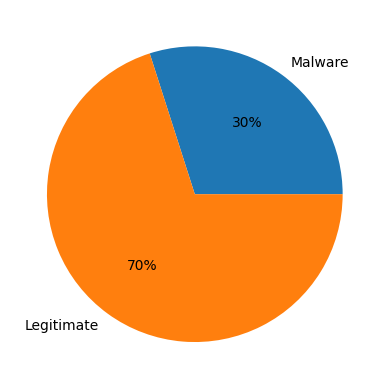

In [6]:
#γραφική απεικόνιση δεδομένων με βάση το εάν είναι νόμιμο ή κακόβουλο λογισμικό#
#0 legit, 1 ransomware
type_classify=['Malware', 'Legitimate']
count_classify=[41323,96724]
plt.pie(count_classify, labels=type_classify, autopct='%0.f%%')

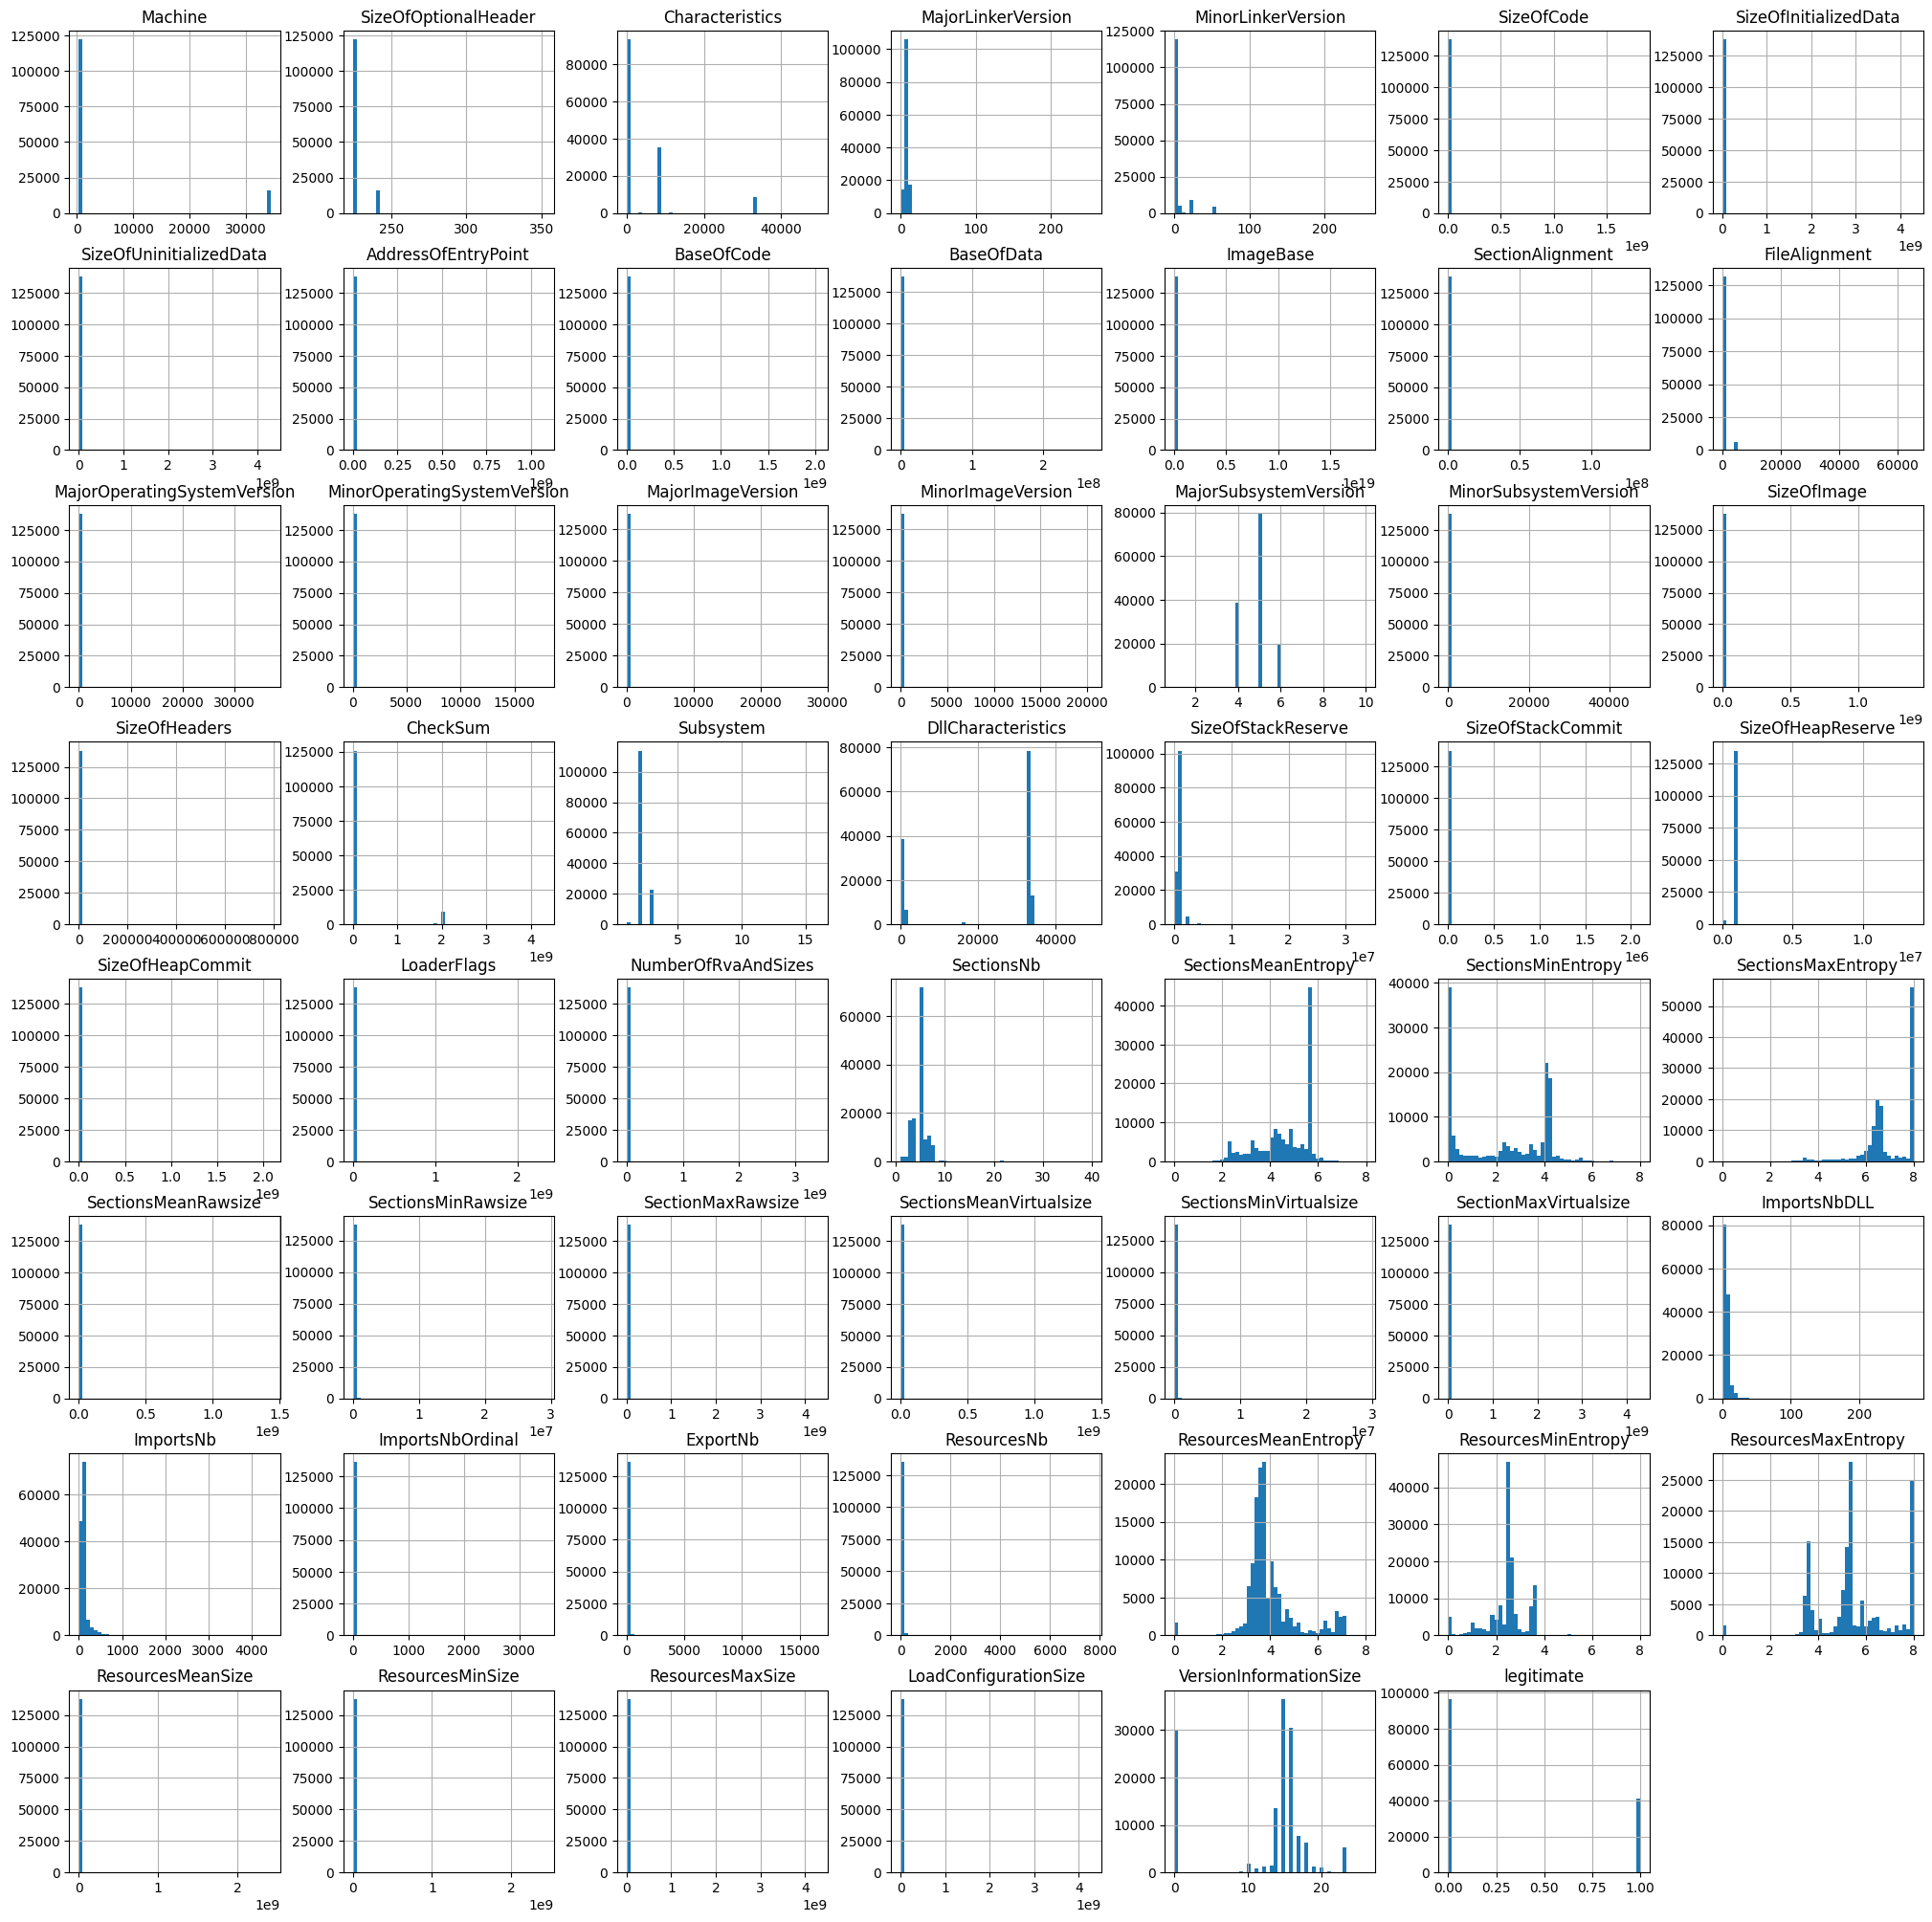

In [7]:
#οπτικοποίηση της κατανομής των δεδομένων
dataset.hist(bins = 50,figsize = (25,25))
plt.show()

In [9]:
#έλεγχος κενών τιμών στα δεδομένα
dataset.isnull().sum()

Name                           0
md5                            0
Machine                        0
SizeOfOptionalHeader           0
Characteristics                0
MajorLinkerVersion             0
MinorLinkerVersion             0
SizeOfCode                     0
SizeOfInitializedData          0
SizeOfUninitializedData        0
AddressOfEntryPoint            0
BaseOfCode                     0
BaseOfData                     0
ImageBase                      0
SectionAlignment               0
FileAlignment                  0
MajorOperatingSystemVersion    0
MinorOperatingSystemVersion    0
MajorImageVersion              0
MinorImageVersion              0
MajorSubsystemVersion          0
MinorSubsystemVersion          0
SizeOfImage                    0
SizeOfHeaders                  0
CheckSum                       0
Subsystem                      0
DllCharacteristics             0
SizeOfStackReserve             0
SizeOfStackCommit              0
SizeOfHeapReserve              0
SizeOfHeapCommit               0
LoaderFlags                    0
NumberOfRvaAndSizes            0
SectionsNb                     0
SectionsMeanEntropy            0
SectionsMinEntropy             0
SectionsMaxEntropy             0
SectionsMeanRawsize            0
SectionsMinRawsize             0
SectionMaxRawsize              0
SectionsMeanVirtualsize        0
SectionsMinVirtualsize         0
SectionMaxVirtualsize          0
ImportsNbDLL                   0
ImportsNb                      0
ImportsNbOrdinal               0
ExportNb                       0
ResourcesNb                    0
ResourcesMeanEntropy           0
ResourcesMinEntropy            0
ResourcesMaxEntropy            0
ResourcesMeanSize              0
ResourcesMinSize               0
ResourcesMaxSize               0
LoadConfigurationSize          0
VersionInformationSize         0
legitimate                     0
dtype: int64

In [10]:
# Ορισμός X και y
X = dataset.drop('legitimate', axis=1)
y = dataset['legitimate']

In [11]:
# Χειρισμός τιμών που λείπουν με στρατηγική "συμπλήρωση με σταθερή τιμή"
imputer = SimpleImputer(strategy='constant', fill_value='unknown')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)
X_imputed

Name  \
0                                       memtest.exe   
1                                           ose.exe   
2                                         setup.exe   
3                                          DW20.EXE   
4                                      dwtrig20.exe   
...                                             ...   
138042  VirusShare_8e292b418568d6e7b87f2a32aee7074b   
138043  VirusShare_260d9e2258aed4c8a3bbd703ec895822   
138044  VirusShare_8d088a51b7d225c9f5d11d239791ec3f   
138045  VirusShare_4286dccf67ca220fe67635388229a9f3   
138046  VirusShare_d7648eae45f09b3adb75127f43be6d11   

                                     md5 Machine SizeOfOptionalHeader  \
0       631ea355665f28d4707448e442fbf5b8     332                  224   
1       9d10f99a6712e28f8acd5641e3a7ea6b     332                  224   
2       4d92f518527353c0db88a70fddcfd390     332                  224   
3       a41e524f8d45f0074fd07805ff0c9b12     332                  224   
4       c87e561258f2f8650cef999bf643a731     332                  224   
...                                  ...     ...                  ...   
138042  8e292b418568d6e7b87f2a32aee7074b     332                  224   
138043  260d9e2258aed4c8a3bbd703ec895822     332                  224   
138044  8d088a51b7d225c9f5d11d239791ec3f     332                  224   
138045  4286dccf67ca220fe67635388229a9f3     332                  224   
138046  d7648eae45f09b3adb75127f43be6d11     332                  224   

       Characteristics MajorLinkerVersion MinorLinkerVersion SizeOfCode  \
0                  258                  9                  0     361984   
1                 3330                  9                  0     130560   
2                 3330                  9                  0     517120   
3                  258                  9                  0     585728   
4                  258                  9                  0     294912   
...                ...                ...                ...        ...   
138042             258                 11                  0     205824   
138043           33167                  2                 25      37888   
138044             258                 10                  0     118272   
138045           33166                  2                 25      49152   
138046             258                 11                  0     111616   

       SizeOfInitializedData SizeOfUninitializedData  ... ExportNb  \
0                     115712                       0  ...        0   
1                      19968                       0  ...        0   
2                     621568                       0  ...        1   
3                     369152                       0  ...        1   
4                     247296                       0  ...        1   
...                      ...                     ...  ...      ...   
138042                223744                       0  ...        0   
138043                185344                       0  ...        0   
138044                380416                       0  ...        0   
138045                 16896                       0  ...        0   
138046                468480                       0  ...        0   

       ResourcesNb ResourcesMeanEntropy ResourcesMinEntropy  \
0                4             3.262823            2.568844   
1                2             4.250461            3.420744   
2               11             4.426324            2.846449   
3               10             4.364291            2.669314   
4                2               4.3061            3.421598   
...            ...                  ...                 ...   
138042           7             4.122736             1.37026   
138043          26             3.377663            2.031619   
138044          22             6.825406            2.617026   
138045          10             3.421627            2.060964   
138046           4             4.407252            1.980482   

       Res

In [12]:
# Ορίζουμε ένα LabelEncoder για κάθε στήλη με συμβολοσειρές
label_encoders = {}
for column in X_imputed.select_dtypes(include='object').columns:
    label_encoders[column] = LabelEncoder()
    X_imputed[column] = label_encoders[column].fit_transform(X_imputed[column])

In [13]:
# Δημιουργία του OneClassSVM με προεπιλεγμένες ρυθμίσεις για τον εντοπισμό ακραίων τιμών
outlier_detector = OneClassSVM(nu=0.05)
outliers = outlier_detector.fit_predict(X_imputed)

In [14]:
# Επαναφορά των αρχικών τιμών συμβολοσειρών αν χρειαστεί
for column in X_imputed.select_dtypes(include='object').columns:
    X_imputed[column] = label_encoders[column].inverse_transform(X_imputed[column])

In [16]:
# Εκτύπωση των ακραίων τιμών
print("Ακραίες Τιμές:\n", outliers)

Ακραίες Τιμές:
 [1 1 1 ... 1 1 1]


In [17]:
# Δημιουργία νέου συνόλου δεδομένων μετά την αφαίρεση των ακραίων τιμών
clean_data = pd.DataFrame(X_imputed[outliers != -1])
clean_data['legitimate'] = y[outliers != -1]

In [18]:
# Αναφορά του νέου συνόλου ανά κλάση
remaining_instances_report = clean_data['legitimate'].value_counts()
print("Αναφορά υπολοίπων περιπτώσεων ανά κατηγορία:\n", remaining_instances_report)

Αναφορά υπολοίπων περιπτώσεων ανά κατηγορία:
 legitimate
0    94379
1    36767
Name: count, dtype: int64


In [19]:
# Εκτύπωση καθαρού συνόλου
clean_data

Name     md5  Machine  SizeOfOptionalHeader  Characteristics  \
0       104383   39819        0                     0               11   
1       105410   73302        0                     0               60   
2       106014   31141        0                     0               60   
3          960   78100        0                     0               11   
4       102860  103346        0                     0               11   
...        ...     ...      ...                   ...              ...   
138042   44748   63122        0                     0               11   
138043   13917   15286        0                     0               94   
138044   44191   62367        0                     0               11   
138045   20602   26689        0                     0               93   
138046   84768  114816        0                     0               11   

        MajorLinkerVersion  MinorLinkerVersion  SizeOfCode  \
0                        9                   0         790   
1                        9                   0         330   
2                        9                   0        1091   
3                        9                   0        1214   
4                        9                   0         657   
...                    ...                 ...         ...   
138042                  11                   0         477   
138043                   2                  24         132   
138044                  10                   0         305   
138045                   2                  24         155   
138046                  11                   0         292   

        SizeOfInitializedData  SizeOfUninitializedData  ...  ResourcesNb  \
0                         279                        0  ...            4   
1                          72                        0  ...            2   
2                        1219                        0  ...           11   
3                         789                        0  ...           10   
4                         539                        0  ...            2   
...                       ...                      ...  ...          ...   
138042                    493                        0  ...            7   
138043                    417                        0  ...           26   
138044                    810                        0  ...           22   
138045                     66                        0  ...           10   
138046                    966                        0  ...            4   

        ResourcesMeanEntropy  ResourcesMinEntropy  ResourcesMaxEntropy  \
0                       8366                 2964                 6338   
1                      33979                 6569                15633   
2                      36835                 4190                16389   
3                      36288                 3442                18970   
4                      35533                 6597                16070   
...                      ...                  ...                  ...   
138042                 31388                  677                20393   
138043                 11483                 1748                15469   
138044                 42533                 3174                22175   
138045                 12999                 1823                13723   
138046                 36694                 1578                18390   

        ResourcesMeanSize  ResourcesMinSize  ResourcesMaxSize  \
0                   12534               179              2526   
1                    3789               386               434   
2                   14611                83              5047   
3                    6360                76              1390   
4                    4822               632               523   
...                   ...               ...               ...   
138042              13567                16              4133   
138043              11999                41           

In [20]:
#τμηματοποίηση συνόλου σε δεδομένα εκπαίδευσης και δοκιμών
X_train, X_test, y_train, y_test = train_test_split(clean_data.drop('legitimate', axis=1), clean_data['legitimate'], test_size=0.2, random_state=42)

In [21]:
#κλιμάκωση δεδομένων
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled

array([[ 0.22873259,  0.5955344 , -0.3494528 , ...,  1.9473634 ,
         0.48208711, -1.70528351],
       [ 0.52986738,  0.94600085, -0.3494528 , ...,  0.35762098,
         0.48208711,  0.07838486],
       [ 1.25331285, -1.05613108, -0.3494528 , ..., -1.20964691,
        -0.77910008,  0.52430195],
       ...,
       [ 0.41096547,  0.8083577 , -0.3494528 , ...,  1.40070353,
         0.48208711,  0.30134341],
       [ 0.38103391,  0.77349646, -0.3494528 , ..., -0.05947984,
        -0.77910008,  0.97021905],
       [ 0.97818697,  1.47369818, -0.3494528 , ..., -0.05947984,
        -0.77910008, -1.70528351]])

In [22]:
#σύγκριση αλγορίθμων: RandomForest, GradientBoosting, AdaBoost
models = {
    'RandomForest': RandomForestClassifier(),
    'GradientBoosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier()
}

ranking_table_comparison = pd.DataFrame(columns=['Accuracy', 'Recall', 'Precision', 'F1 Score'])

In [23]:
#αξιολόγηση μοντέλων
for model_name, model in models.items():
    pipeline = make_pipeline(StandardScaler(), model)

    #αξιολόγηση στο σύνολο δοκιμών
    y_pred = pipeline.fit(X_train_scaled, y_train).predict(X_test_scaled)

    #υπολογισμών μετρικών αξιολόγησης
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    #κατάταξη αποτελεσμάτων αξιολόγησης
    ranking_table_comparison.loc[model_name] = [accuracy, recall, precision, f1]

    #αποτελέσματα αξιολόγησης
    print(f"{model_name} - Αποτελέσματα Κατηγοριοποίησης:\n", classification_report(y_test, y_pred))
    print(f"{model_name} - Πίνακας Συγχυσης:\n", confusion_matrix(y_test, y_pred))
    print()

RandomForest - Αποτελέσματα Κατηγοριοποίησης:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     18837
           1       1.00      1.00      1.00      7393

    accuracy                           1.00     26230
   macro avg       1.00      1.00      1.00     26230
weighted avg       1.00      1.00      1.00     26230

RandomForest - Πίνακας Συγχυσης:
 [[18826    11]
 [    1  7392]]

GradientBoosting - Αποτελέσματα Κατηγοριοποίησης:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     18837
           1       1.00      1.00      1.00      7393

    accuracy                           1.00     26230
   macro avg       1.00      1.00      1.00     26230
weighted avg       1.00      1.00      1.00     26230

GradientBoosting - Πίνακας Συγχυσης:
 [[18837     0]
 [    0  7393]]

AdaBoost - Αποτελέσματα Κατηγοριοποίησης:
               precision    recall  f1-score   support

           0  

In [24]:
#αποτύπωση αποτελεσμάτων αξιολόγησης
print("Κατάταξη Αποτελεσμάτων:")
print(ranking_table_comparison)

Κατάταξη Αποτελεσμάτων:
                  Accuracy    Recall  Precision  F1 Score
RandomForest      0.999543  0.999865   0.998514  0.999189
GradientBoosting  1.000000  1.000000   1.000000  1.000000
AdaBoost          1.000000  1.000000   1.000000  1.000000
